In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Node:
    def __init__(self):
        self.x = None
        self.y = None
        self.text = ''
        self.isRoot = False
        self.parentNode = None
        self.leftChild = None
        self.rightChild = None
        self.isLeaf = False
 
    def getLevel(self, cnt = 1):
        if self.isRoot:
            return cnt
        else:
            cnt += 1
            cnt = self.parentNode.getLevel(cnt)
            return cnt
    
    def setLeftChild(self, node):
        self.leftChild = node
        node.parentNode = self
        
    def setRightChild(self, node):
        self.rightChild = node
        node.parentNode = self

In [3]:
class Tree:
    def __init__(self, root):
        assert root.isRoot, 'node should be specified as root'
        self.__root = root
    
    def getRoot(self):
        return self.__root
    
    def getLengthOfBranch(self, node, cnt = 1):
        if node.parentNode is None:
            return cnt
        else:
            cnt += 1
            return self.getLengthOfBranch(node.parentNode, cnt)
            
    def getDepth(self, remove_Leaf=False):
        all_nodes = self.traverseInOrder()
        if remove_Leaf:
            depth = max([self.getLengthOfBranch(node) for node in all_nodes if not node.isLeaf])
        else:
            depth = max([self.getLengthOfBranch(node) for node in all_nodes])
        return depth
        
    def traverseInOrder(self, node=None):
        if node is None:
            node = self.__root
        res = []
        if node.leftChild != None:
            res = res + self.traverseInOrder(node.leftChild)
        res.append(node)
        if node.rightChild != None:
            res = res + self.traverseInOrder(node.rightChild)
        return res
    
    def getRightMostNode(self, node = None, level = None):
        if node is None:
            node = self.__root
        if level is None:
            return [nd for nd in self.traverseInOrder(node)][-1]
        else:
            return [nd for nd in self.traverseInOrder(node) if nd.getLevel()==level][-1]
        
    def getLeftMostNode(self, node = None, level = None):
        if node is None:
            node = self.__root
        if level is None:
            return [nd for nd in self.traverseInOrder(node)][0]
        else:
            return [nd for nd in self.traverseInOrder(node) if nd.getLevel()==level][0]
    
    def getDistanceBetweenSubtrees(self):
        root.leftChild.parentNode = None
        root.rightChild.parentNode = None
        root.leftChild.isRoot = True
        root.rightChild.isRoot = True
        left_subtree = Tree(root.leftChild)
        right_subtree = Tree(root.rightChild)
        if left_subtree.getDepth() == right_subtree.getDepth():
            level = right_subtree.getDepth()
        elif left_subtree.getDepth() > right_subtree.getDepth():
            level = right_subtree.getDepth()
        else:
            level = left_subtree.getDepth()
 
        lrmn = left_subtree.getRightMostNode(level=level)
        rlmn = right_subtree.getLeftMostNode(level=level)
        x_diff = rlmn.x - lrmn.x
        
        root.leftChild.parentNode = root
        root.rightChild.parentNode = root
        root.leftChild.isRoot = False
        root.rightChild.isRoot = False
        return x_diff
    
    def moveTree(self, shift=1):
        for nd in self.traverseInOrder():
            nd.x = nd.x+shift
        return

In [4]:
root = Node()
root.isRoot = True
root.text = 'Root'
left_child = Node()
left_child.text = 'Left Child'
root.setLeftChild(left_child)
right_child = Node()
right_child.text = 'Right Child'
root.setRightChild(right_child)
l_child = Node()
l_child.text = 'Left Child1'
l_child.isLeaf = True
right_child.setLeftChild(l_child)
r_child = Node()
r_child.text = 'Right Child1'
r_child.isLeaf = True
right_child.setRightChild(r_child)
 
ll_child = Node()
ll_child.text = 'Left Child2'
left_child.setLeftChild(ll_child)
 
rr_child = Node()
rr_child.text = 'Right Child2'
left_child.setRightChild(rr_child)
 
lll_child = Node()
lll_child.text = 'Left Child3'
lll_child.isLeaf = True
rr_child.setLeftChild(lll_child)
 
rrr_child = Node()
rrr_child.text = 'Right Child3'
rrr_child.isLeaf = True
rr_child.setRightChild(rrr_child)
 
llll_child = Node()
llll_child.text = 'LC4'
llll_child.isLeaf = True
ll_child.setLeftChild(llll_child)
 
rrrr_child = Node()
rrrr_child.text = 'RC4'
rrrr_child.isLeaf = True
ll_child.setRightChild(rrrr_child)
 
tree = Tree(root)

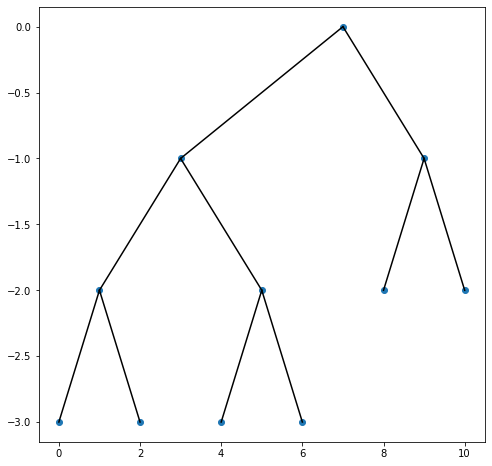

In [6]:
def draw_connect_line(node):
    if node is not None:
        if node.parentNode is not None:
            plt.plot((node.parentNode.x, node.x), (node.parentNode.y, node.y),color='k')
        draw_connect_line(node.leftChild)
        draw_connect_line(node.rightChild)
 
for i, nd in enumerate(tree.traverseInOrder()):
    nd.x = i
    nd.y = -(nd.getLevel()-1)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
x_coords = []
y_coords = []
 
for nd in tree.traverseInOrder():
    x_coords.append(nd.x)
    y_coords.append(nd.y)
    
draw_connect_line(root)
plt.scatter(x_coords, y_coords)
plt.show()

In [8]:
def drawing_binary_tree(tree, offset):
    for i, nd in enumerate(tree.traverseInOrder()):
        nd.x = i
        nd.y = -(nd.getLevel()-1)
 
    def tidy_drawing_tree(tree):
        root = tree.getRoot()
        if root.leftChild is None and root.rightChild is None:
            return
        else:
            root.leftChild.parentNode = None
            root.rightChild.parentNode = None
            root.leftChild.isRoot = True
            root.rightChild.isRoot = True
            left_subtree = Tree(root.leftChild)
            right_subtree = Tree(root.rightChild)
 
            if left_subtree.getDepth() == right_subtree.getDepth():
                level = right_subtree.getDepth()
 
            elif left_subtree.getDepth() > right_subtree.getDepth():
                level = right_subtree.getDepth()
            else:
                level = left_subtree.getDepth()
 
            lrmn = left_subtree.getRightMostNode(level=level)
            rlmn = right_subtree.getLeftMostNode(level=level)
            x_diff = rlmn.x - lrmn.x
            shift = offset - x_diff
            right_subtree.moveTree(shift=shift/2)
            left_subtree.moveTree(shift=-shift/2)
 
            tidy_drawing_tree(left_subtree)
            tidy_drawing_tree(right_subtree)
 
            root.x = (root.leftChild.x + root.rightChild.x)/2
 
            root.leftChild.parentNode = root
            root.rightChild.parentNode = root
            root.leftChild.isRoot = False
            root.rightChild.isRoot = False
 
    max_cnt = tree.getDepth()
    cnt = 1
    while cnt <= max_cnt:
        tidy_drawing_tree(tree)
        if tree.getDistanceBetweenSubtrees() == offset:
            break
        else:
            cnt += 1


In [9]:
drawing_binary_tree(tree, offset=2)

In [10]:
colors = sns.color_palette('hls', tree.getDepth()-1)
 
def drawNode(node, ax):
    if node is not None:
        if node.isLeaf:
            bbox=dict(boxstyle='round',fc='white')
        else:
            bbox=dict(boxstyle='square',fc=colors[node.getLevel()-1], pad=1)
        ## 텍스트 표시
        ax.text(node.x,node.y,node.text,bbox=bbox,fontsize=20,ha='center',va='center')     
        if node.parentNode is not None: ## 부모 노드와 자식 노드 연결
            ax.plot((node.parentNode.x, node.x), (node.parentNode.y, node.y),color='k')
        drawNode(node.leftChild, ax)
        drawNode(node.rightChild, ax)

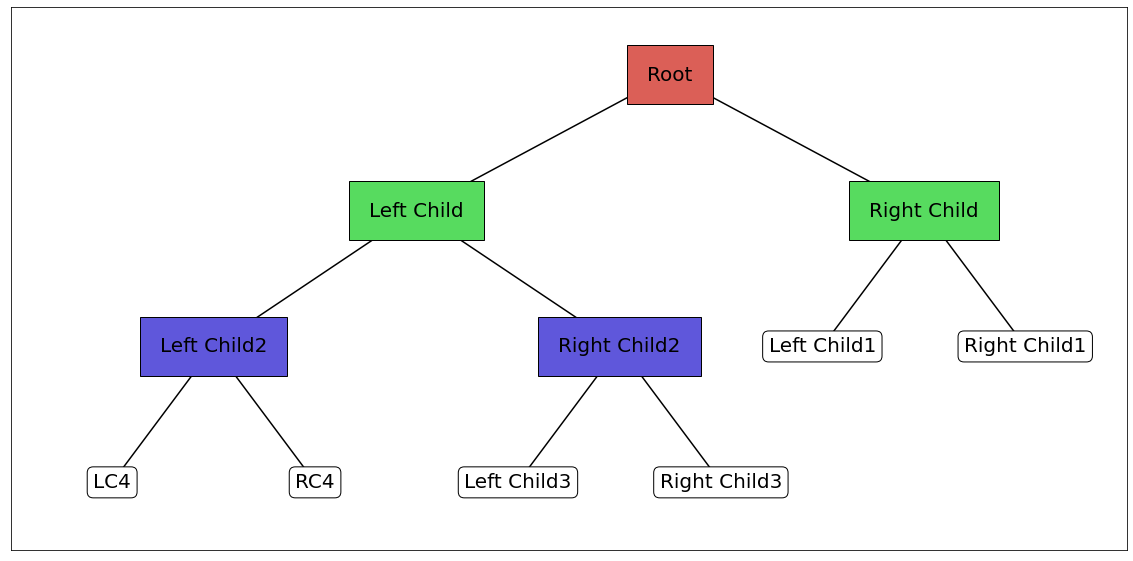

In [11]:
fig = plt.figure(figsize=(20,10))
renderer = fig.canvas.get_renderer()
ax = fig.add_subplot()
 
drawNode(root, ax)
 
x_coords = []
y_coords = []
 
for nd in tree.traverseInOrder():
    x_coords.append(nd.x)
    y_coords.append(nd.y)
 
min_x, max_x = min(x_coords), max(x_coords)
min_y, max_y = min(y_coords), max(y_coords)
 
## 캔버스 안에 나무가 표시되도록  x,y 축 상한 하한 설정
ax.set_xlim(min_x-1,max_x+1)
ax.set_ylim(min_y-0.5,max_y+0.5)
 
## 축은 안보이게 설정
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)